# <u>Deep Learning Project</u>: Deep Fake Voice Recognition 

#### ANNA KOUTOUGERA(2022202304012) 
#### DESPOINA ANGELIKI MOISIDOU(2022202304016)

## **Introduction**

In recent years, generative Artificial Intelligence (AI) has advanced significantly, leading to the development of state-of-the-art systems capable of real-time voice conversion via a microphone. These sophisticated deep learning models can clone an individual’s speech and use it in online or phone conversations, leveraging consumer-level computing technology. This report examines the implications of such technology, focusing on classification of Real and Fake audio 

### <u>Original Audio Classification Dataset</u>: 

We present an original audio classification dataset, featuring recordings from 8 well-known public figures. This dataset includes both authentic audio collected from the internet and AI-generated speech produced via Retrieval-based Voice Conversion (RVC).

Table 1
| Photo                  | Individual             | Source                       | Length (MM:SS) |
|------------------------|------------------------|------------------------------|----------------|
| <img src="./celebrity-pictures/Joe_Biden.jpeg" width="50"/>     | Joe Biden              | Victory Speech[2]              | 10:00          |
| <img src="./celebrity-pictures/Ryan-Gosling.webp" width="50"/>  | Ryan Gosling           | Golden Globes Speech[3]        | 1:33           |
| <img src="./celebrity-pictures/Elon-Mask.jpeg" width="50"/>     | Elon Musk              | Commencement Speech[4]         | 10:00          |
| <img src="./celebrity-pictures/Barack_Obama.jpeg" width="50"/>  | Barack Obama           | Victory Speech[5]              | 10:00          |
| <img src="./celebrity-pictures/Margot-Robbie.jpeg" width="50"/> | Margot Robbie          | BAFTAs Speech[6]               | 1:19           |
| <img src="./celebrity-pictures/Linus-Sebastian.jpeg" width="50"/>| Linus Sebastian        | Stepping Down Monologue[7]     | 9:30           |
| <img src="./celebrity-pictures/Talor-Swift.jpeg" width="50"/>  | Taylor Swift           | Women in Music Speech[8]       | 10:00          |
| <img src="./celebrity-pictures/Donald_Trump.jpeg" width="50"/>  | Donald Trump           | Victory Speech[9]              | 10:00          |
|                        | **Total**              |                              | **62:22**      |


[2] [Victory Speech by Joe Biden:](https://www.youtube.com/watch?v=1AfNYztas2c) Last accessed: 07/23

[3] [Golden Globes Speech by Ryan Gosling:](https://www.youtube.com/watch?v=K8JLyUW_MSw) Last accessed: 07/23 

[4] [Commencement Speech by Elon Musk:](https://www.youtube.com/watch?v=MxZpaJK74Y4) Last accessed: 07/23 

[5] [Victory Speech by Barack Obama:](https://www.youtube.com/watch?v=IeCY-jKpoZ0) Last accessed: 07/23

[6] [BAFTAs Speech by Margot Robbie:](https://www.youtube.com/watch?v=-JA3_QBfjG8)Last accessed: 07/23

[7] [Stepping Down Monologue by Linus Sebastian:](https://www.youtube.com/watch?v=0vuzqunync8) Last accessed: 07/23 

[8] [Women in Music Speech by Taylor Swift:](https://www.youtube.com/watch?v=ZVpkFb9-fts) Last accessed: 07/23 

[9] [Victory Speech by Donald Trump:](https://www.youtube.com/watch?v=Qsvy10D5rtc) Last accessed: 07/23

**Eight** individuals were selected, each serving as a source for real speech data and its conversion into AI-generated speech. Table 1 details the sources of the speech. In total, **62 minutes and 22 seconds of speech** were collected from these eight individuals. Audio tracks were limited to a **maximum of ten minutes each**. The dataset exhibits varying levels of background noise; for instance, some tracks include cheering from supporters during Presidential victory speeches, while others, like Linus Sebastian's Stepping Down Monologue, are of production-level quality. In contrast, Elon Musk’s Commencement Speech was recorded from a distance without studio-quality equipment, resulting in lower quality. These tracks were intentionally chosen to introduce variation within the dataset.

### <u>CSV from Source Dataset after Cleaning </u>:

The following dataset is part of our datasource.It consists of audio features derived from segments of longer audio clips, but the cleanling and transformation processes of the audio are unknown. Upon evaluation, we identified a significant issue: during a random train/test split, segments from the same original audio clip could be divided between the training and test sets. This can cause data leakage, as segments from the same source share inherent characteristics, leading to overly optimistic performance assessments. To prevent this, it is crucial to include an additional column indicating the original audio source for each segment. This would enable grouping segments from the same source together, ensuring they are entirely within either the training or test set, thereby avoiding data leakage.


In [1]:
import pandas as pd


datasource = pd.read_csv("DATASET-balanced.csv")


datasource.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE


For the reason we said before we decide to make our own audio cleaning and transformation and recreate a new csv dataset for further analysis.

## <u>Data Preparation</u>: 
For more details go to [notebook](./deep-learning-prep.ipynb)

### 1.  Exploratory Data Analysis

As the first step in our project, we conducted an exploratory data analysis (EDA) to understand the nature of the audio data we are working with. <br> This step was needed for building a strategy for subsequent modeling and experimentation. <br> We extracted and analyzed basic information and features from both real and fake short audio signals.

In this step, we examined the following aspects of the audio data:

- **Duration of Each Audio**: Measured the length of each audio file to understand the variability in duration.
- **Number of Channels**: Identified whether the audio files were mono or stereo.
- **Sample Rate**: Analyzed the sample rate of the audio files to ensure consistency and quality.
- **Class Distribution**: Checked the distribution of real and fake audio samples to assess the balance of the dataset.
- **FFT Visuals**: Generated Fast Fourier Transform (FFT) visuals to observe the frequency domain representation of the audio signals.
- **Spectrogram**: Created spectrograms to visualize the time-frequency representation of the audio signals.
- **MFCC Visuals**: Extracted and visualized Mel-Frequency Cepstral Coefficients (MFCC) to capture important features of the audio signals.

During our initial exploratory data analysis (EDA), we observed the following characteristics of the audio data:

- All audio signals are stereo (2 channels).
- The audio signals have varying lengths and sample rates.
- There is a significant imbalance between the number of real and fake samples.

### 2.  Audio Cleaning

As part of our data preparation, we made several changes and adjustments to the audio files to create a new dataset suitable for our modeling tasks. The following adjustments were applied:

- **Downsampling**: Reduced the sample rate of the audio files to ensure consistency and manageability.
- **Changing Sample Rate**: Standardized the sample rate of all audio files to 16000 Hz.
- **Changing Number of Channels**: Converted all audio files from stereo (2 channels) to mono (1 channel).

Additionally, we considered implementing a step to remove silence from the audio files. However, after discussion, it was decided not to include this step in the preprocessing pipeline.


### 3.  Preprocessing

```plaintext
+--------------------+
| Original Audio     |
| Files              |
+--------------------+
          |
          v
+--------------------------------------+
| Audio Splitting                      |
|   - 3-Second Segments                |
|   - Data Augmentation (training only)|
+--------------------------------------+
          |
          v
+-----------------------------+
|                             |
| 3-Second Segments           |
|                             |
+-----------------------------+
          |
          +-------------------------------------+
          |                                     |
          v                                     v
+----------------------+             +----------------------+
| Feature Extraction   |             | Melgram Creation     |
| (Dataset)            |             | (Pickle files)       |
+----------------------+             +----------------------+
          |                                     
          v                                     
+----------------------------+     
| Preprocessed Dataset       |     
| (Normalized, Arranged)     |     
+----------------------------+     

In the preprocessing stage of audio data we typically follow these steps:

<u>Approach to the Problem</u>

In our analysis, we employed two distinct methods to address the challenge of classifying audio samples:

1. **Audio Splitting into 3-Second Segments**
- To improve the accuracy and efficiency of our classification models, we divided the original audio files into 3-second segments.
- This segmentation process increased the number of training samples, providing the models with more data to learn from.
- By focusing on shorter segments, the models could capture finer details and variations within the audio, enhancing their ability to distinguish between different classes.


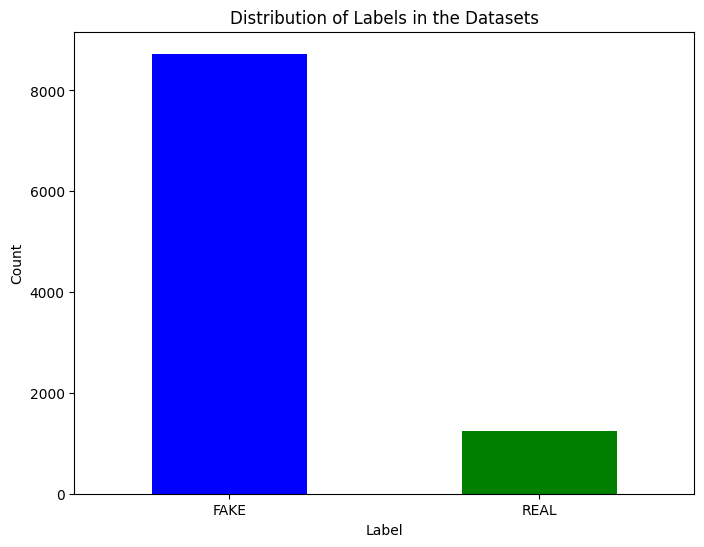

In [2]:
import matplotlib.pyplot as plt

new_dataset = pd.read_csv("classic_dataset.csv")


label_counts = new_dataset["LABEL"].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["blue", "green"])
plt.title("Distribution of Labels in the Datasets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

2. **Data Augmentation**
To address the imbalance in our dataset, which contains significantly more fake audio samples than real ones, we applied the following approach for the real audio files in the training set:

- Instead of creating non-overlapping 3-second segments, we generated overlapping segments.
- Each segment is 3 seconds long with a step of 1.5 seconds between the start of consecutive segments.

This helped in generating additional training samples by making small modifications to the original audio files. 

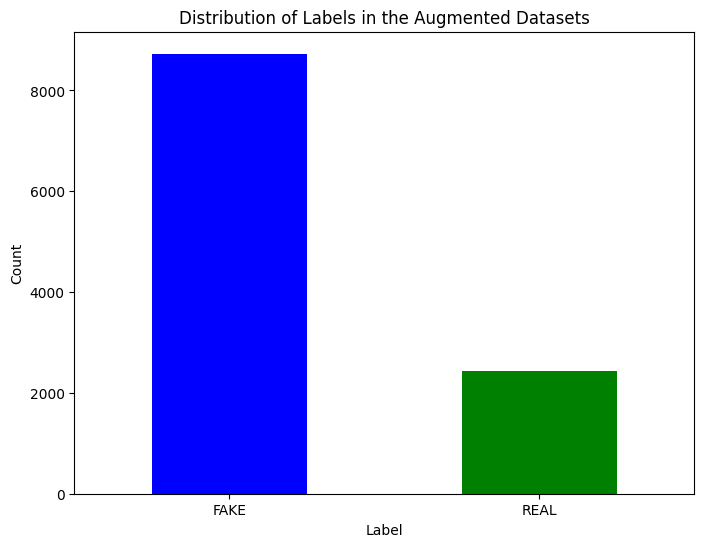

In [3]:
aug_dataset = pd.read_csv("classic_dataset_augmented.csv")


label_counts = aug_dataset["LABEL"].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["blue", "green"])
plt.title("Distribution of Labels in the Augmented Datasets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<u>Data Extraction Methods</u>

We extracted data using two distinct methods to facilitate our analysis and model training:

1. **Feature Vectors from Audio Segments**
For the first method, we processed the audio files by splitting them into 3-second segments and extracting relevant features. These features, which included chroma_stft, rms, spectral_centroid, spectral_bandwidth, and various MFCCs, were compiled into a CSV file. This file contained the feature vectors for each audio segment, serving as the input for traditional machine learning models such as Random Forest, SVM, KNN, and XGBoost. The feature extraction allowed us to capture the essential characteristics of the audio in a structured format suitable for these models.

A) After extracting feature vectors from audio data we conclude with the following dataset :

In [4]:
new_dataset.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,original_sample,LABEL
0,0.406384,0.000002,1726.659103,1313.571519,2691.655585,0.166597,-1100.7047,24.245398,-4.094656,-11.856869,...,-0.645655,-1.132683,-2.797139,-3.261496,-0.838549,0.040131,-0.060138,-1.380203,biden-to-linus,FAKE
1,0.488609,0.000002,1494.082478,1153.538601,2407.413564,0.133025,-1096.9451,24.470573,-14.613540,-24.321949,...,-4.825898,-5.560425,-2.493666,0.818739,1.947798,2.038546,0.929982,-0.998090,biden-to-linus,FAKE
2,0.362642,0.000003,1782.153328,1487.245881,3030.917553,0.133561,-1091.5063,32.406384,6.421868,0.284660,...,-2.619975,-1.499475,-1.358122,-2.547379,-2.780402,-4.007704,-1.956772,-2.554486,biden-to-linus,FAKE


B) After extracting feature vectors from Data Augmentation we conclude with the following dataset 

In [5]:
aug_dataset.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,original_sample,LABEL
0,0.406384,0.000002,1726.659103,1313.571519,2691.655585,0.166597,-1100.7047,24.245398,-4.094656,-11.856869,...,-0.645655,-1.132683,-2.797139,-3.261496,-0.838549,0.040131,-0.060138,-1.380203,biden-to-linus,FAKE
1,0.488609,0.000002,1494.082478,1153.538601,2407.413564,0.133025,-1096.9451,24.470573,-14.613540,-24.321949,...,-4.825898,-5.560425,-2.493666,0.818739,1.947798,2.038546,0.929982,-0.998090,biden-to-linus,FAKE
2,0.362642,0.000003,1782.153328,1487.245881,3030.917553,0.133561,-1091.5063,32.406384,6.421868,0.284660,...,-2.619975,-1.499475,-1.358122,-2.547379,-2.780402,-4.007704,-1.956772,-2.554486,biden-to-linus,FAKE


As we can see on the new dataset there is column that give us the information of the origin of each segment and we know exactly the stepts have made for cleaning and transforming.

2. **Mel-spectrogram Images for CNN**
The second method involved generating mel-spectrogram images from the audio segments stored in pickle format. <br> These images visually represent the frequency distribution of the audio over time, providing a rich and detailed depiction of the audio signal. <br>
We saved these mel-spectrogram images as pickle files to be used as input mostly for Convolutional Neural Networks (CNNs). <br> CNNs are particularly well-suited for image data, and by using mel-spectrograms, we aimed to leverage the deep learning capabilities of CNNs to identify intricate patterns and features in the audio data.

During the creations of the mel-spectrogram images we ensured by playing with the windows size and the hop length to have a good quality of the images <br> and to be able to capture the most important features of the audio data, creating a size of 128x128 for each "image".


<img src="./celebrity-pictures/image.png" alt="Example Image" width="800"/>

## <u>Modeling and evaluation</u>: 

We will proceed with the modeling of our data and run experiments using the architectures created in the dl/models folder for both audio features and melgram images. <br>

- To check results with initial preprocessing (with no overlapping segments for real audio files in the training set), go to the [deep-learning-modelling notebook](./deep-learning-modelling.ipynb).
- Otherwise, go to the [deep-learning-modelling-aug](./deep-learning-modelling-aug.ipynb) notebook for experiments with overlapping segments.

For further feature analysis and modeling using machine learning models, go to one of the following notebooks: <br>
[machine-learning-classic notebook](./machine-learning-classic.ipynb),
[machine-learning-cleaned notebook](./machine-learning-cleaned.ipynb),
[machine-learning-augmented notebook](./machine-learning-augmented.ipynb).

### 1. Data Splitting

In our data preparation process, we employed a strategic approach to split the dataset into training, validation, and test sets. The primary objective was to ensure that the test set included all audio samples from specific individuals (Margot Robbie and Ryan Gosling) while maintaining a balanced and stratified distribution for the remaining data. This method helps us evaluate our model's performance on unseen data effectively.

- **Test Set Creation** :To create a robust test set, we identified and excluded all real and fake audio samples related to Margot Robbie and Ryan Gosling. <br> This decision was made to ensure that the test set reflects a scenario where the model encounters entirely new speakers during evaluation. The steps involved were as follows:

- Identification of Test Samples: We generated a list of original test samples by appending "-original" to the names of the speakers (Margot Robbie and Ryan Gosling).Additionally, we created a list of potential fake test samples by appending "-to" to the same speaker names.
We then identified the actual fake test samples by checking if any string from the potential fake test samples was present in the original samples.

- Extraction of Test Set: We filtered the dataset to include only those samples where the original_sample matched the identified test samples.
These test samples were removed from the dataset to ensure they were not included in the training or validation sets.

- Training and Validation Set Creation: For the remaining data, we split it into training and validation sets in a stratified manner based on the labels in a 0.9:0.1 ratio. This ensured that the distribution of real and fake samples was consistent across both sets.

- The process varied slightly based on the type of data:

    1. For Image Data:The data was split directly into training and validation sets using the train_test_split function, with stratification based on the LABEL column.

    2. For Tabular Data: Before splitting, we normalized the features (all columns except the last two) using StandardScaler. This step ensures that the features have a mean of 0 and a standard deviation of 1, which is crucial for algorithms that are sensitive to feature scaling.

- After normalization, we split the data into training and validation sets, maintaining stratification based on the LABEL column.The test set features were also normalized using the same scaler to ensure consistency in feature scaling across all sets.


### 2. Deep Learning Process

For the deep learning process, we trained multiple architectures of neural networks (NNs) and convolutional neural networks (CNNs). <br> Given the binary classification problem with imbalanced classes, we utilized the F1 score as the primary metric for evaluating the models.

#### Criterion
We employed an alternative to the binary cross-entropy loss function, known as binary cross-entropy loss logit, with class weights introduced to balance the classes.

#### Optimizers
The models were trained using the Adam optimizer with usually but not always a typical learning rate of 0.001. <br> We also experimented with alternative optimizers, such as Stochastic Gradient Descent (SGD).

#### Regularization Techniques
During experimentation, various regularization techniques were tested to improve model performance and prevent overfitting. These techniques included:
- Dropout
- Weight Decay
- Early Stopping

#### Transfer Learning
For the melgram images, we applied transfer learning using the ResNet18 and ResNet34 architectures with pretrained ImageNet weights. <br>
Additionally, we tested the VGG16 and AlexNet architectures, but their performance did not match that of the ResNet models, leading to <br> 
their exclusion from further experiments and the deliverables.

#### Training Function
A custom training function was implemented, which accepts the model, criterion, optimizer, dataloaders, number of epochs, and device as inputs. <br> This function returns the trained model and the training history. For each epoch, we report the following metrics:
- Train Loss
- Train Accuracy
- Validation Loss
- Validation Accuracy
- Validation Precision
- Validation Recall
- Validation F1 Score

#### Early Stopping
An alternative training function with early stopping was also developed. <br>This function halts the training process if the validation loss does not decrease for a specified number of epochs (controlled by the patience parameter).

#### Model Saving
During training, the models were saved whenever the validation F1 score improved. <br>The saved models are available for download via the Google Drive link provided in the README file.

#### Evaluation
Model evaluation was conducted using the test set. The saved models were loaded, and the test set was passed <br>through the models to obtain predictions. These predictions were then compared to the true labels, and a comprehensive report was generated. The report includes:
- Classification Report
- Confusion Matrix
- ROC Curve
- AUC Curve

## <u>Results</u>: 

### 1. Best Model architectures

**Neural Network (NN) for Dataset with 26 Features** <br>


Overview


This neural network is designed for binary classification tasks where the input consists of 26 features. <br>
The architecture consists of multiple fully connected (dense) layers followed by ReLU activation functions and <br> 
a Sigmoid activation function at the output layer. The network is simple yet effective for tabular data.

Architecture Summary


- Input: The model takes in a dataset with 26 features.
- Dense Layers: Five fully connected layers, each with 26 neurons, process the input features. These layers help the model learn complex relationships between the features.
- Activation Functions: Each dense layer is followed by a ReLU activation function, which introduces non-linearity into the model, allowing it to learn more complex patterns.
- Output Layer: The final layer is a fully connected layer with a single neuron, followed by a Sigmoid activation function. This layer outputs a value between 0 and 1, suitable for binary classification tasks.
- Total Parameters: 3,537


**Convolutional Neural Network (CNN) for Melgram Pickle Files (128x128)**<br>


Overview


This convolutional neural network (CNN) is designed to process mel spectrogram images of size 128x128 pixels. <br>
The architecture consists of multiple convolutional layers, batch normalization layers, ReLU activations, max-pooling layers, <br>
dropout layers, and fully connected layers. It is tailored for binary classification tasks involving image data.

Architecture Summary


- Input: The model processes mel spectrogram images with dimensions of 128x128 pixels.
- Convolutional Layers: The network includes three convolutional layers. Each layer applies a series of filters (16, 32, and 64 filters, respectively) to the input, extracting different levels of features from the images.
- Batch Normalization: After each convolutional layer, batch normalization is applied to stabilize and accelerate the training process.
- Activation Functions: Each convolutional layer is followed by a ReLU activation function, introducing non-linearity into the model and allowing it to learn complex patterns.
- Pooling Layers: Max-pooling layers are used to downsample the feature maps, reducing the spatial dimensions and computational complexity.
- Dropout Layers: Dropout is applied after each pooling layer and before the fully connected layers to prevent overfitting by randomly dropping a fraction of the neurons during training.
- Fully Connected Layers: The flattened output from the convolutional layers is fed into a fully connected layer with 512 neurons, followed by a ReLU activation function.
- Output Layer: The final layer is a fully connected layer with a single neuron, producing a value between 0 and 1 after applying the Sigmoid activation function, making it suitable for binary classification tasks.
- Total Parameters: 8,413,153

Best NN model architecture
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 26]             702
              ReLU-2                [-1, 1, 26]               0
            Linear-3                [-1, 1, 26]             702
              ReLU-4                [-1, 1, 26]               0
            Linear-5                [-1, 1, 26]             702
              ReLU-6                [-1, 1, 26]               0
            Linear-7                [-1, 1, 26]             702
              ReLU-8                [-1, 1, 26]               0
            Linear-9                [-1, 1, 26]             702
             ReLU-10                [-1, 1, 26]               0
           Linear-11                 [-1, 1, 1]              27
          Sigmoid-12                 [-1, 1, 1]               0
Total params: 3,537
Trainable params: 3,537
Non-trainable params: 0
--------

None

Best CNN model architecture
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             160
       BatchNorm2d-2         [-1, 16, 128, 128]              32
              ReLU-3         [-1, 16, 128, 128]               0
         MaxPool2d-4           [-1, 16, 64, 64]               0
           Dropout-5           [-1, 16, 64, 64]               0
            Conv2d-6           [-1, 32, 64, 64]           4,640
       BatchNorm2d-7           [-1, 32, 64, 64]              64
              ReLU-8           [-1, 32, 64, 64]               0
         MaxPool2d-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          18,496
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
        Max

None

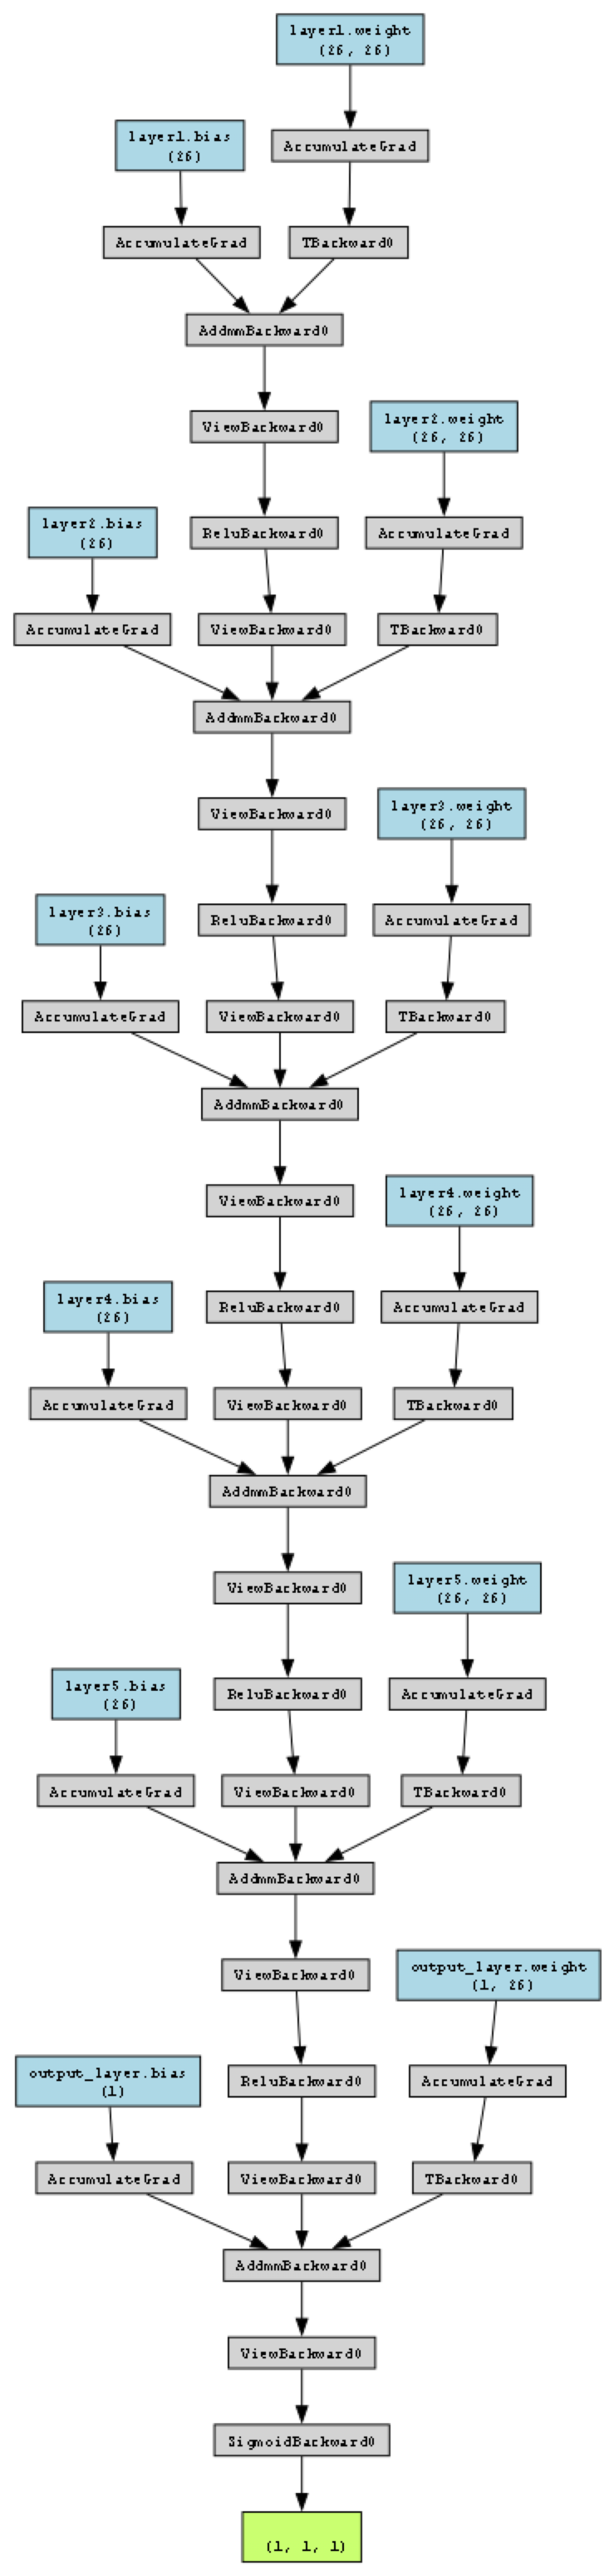

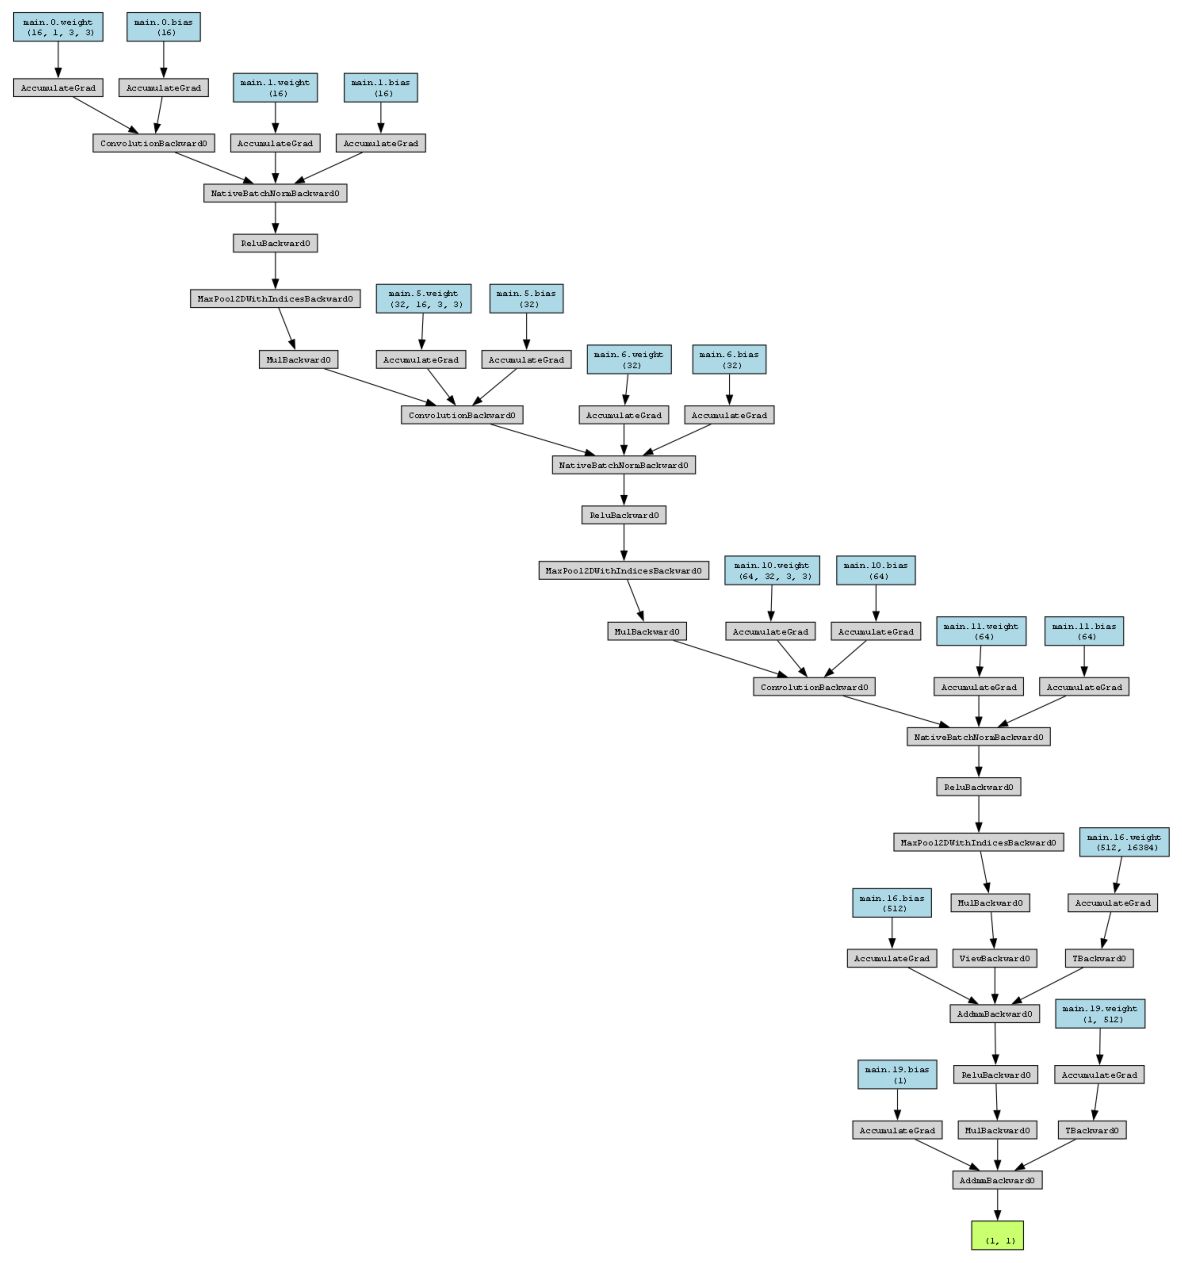

In [30]:
from torchviz import make_dot
import torch
from dl.models import audio_features_cnn, audio_features_nn, melgram_cnn
from torchsummary import summary
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

################ Architecture picture of best NN model #################
# model = audio_features_nn.AudioFeatureNN1(26,1)
# dummy_input = torch.randn(1, 1, 26)
# # Use torchviz to create a graph of the model
# model_viz = make_dot(model(dummy_input), params=dict(model.named_parameters()))
# model_viz.format = "png"
# model_viz.render("audiofeatures_nn_model", directory="images", cleanup=True)

################ Architecture picture of best CNN model #################
# model = melgram_cnn.MelgramCNN1()
# dummy_input = torch.randn(1, 1, 128, 128)
# # Use torchviz to create a graph of the model
# model_viz = make_dot(model(dummy_input), params=dict(model.named_parameters()))
# model_viz.format = "png"
# model_viz.render("melgram_cnn_model", directory="images", cleanup=True)

print("Best NN model architecture")
# show image stored in images folder
# in the best resolution
model = audio_features_nn.AudioFeatureNN1(26, 1).to("cuda")
plt.figure(figsize=(15, 40))
img = plt.imread("images/audiofeatures_nn_model.png")
plt.imshow(img)
plt.axis("off")
display(summary(model, (1, 26)))

print("Best CNN model architecture")
# show image stored in images folder
# in the best resolution
model = melgram_cnn.MelgramCNN1().to("cuda")
plt.figure(figsize=(15, 40))
img = plt.imread("images/melgram_cnn_model.png")
plt.imshow(img)
plt.axis("off")
display(summary(model, (1, 128, 128)))

This is a summary of all the models we used:

<img src="./celebrity-pictures/Picture 1.png" alt="Example Image" width="600"/>

### 2. Results

**Machine Learning Baseline** <br>
The best machine learning algorithm for our dataset was an SVM after having performed oversampling in our training data. <br>This method provided a solid baseline for our experiments. The reported results for this method can be seen below.

<img src="./celebrity-pictures/svm.png" alt="Example Image" width="1200" height = 800/>

**Neural Network for Tabular Data** <br>
For the dataset, we implemented a neural network (NN) that demonstrated improved performance over the baseline. <br> 
It achieved better performance in the augmented dataset. <br>
The training and validation loss, as well as the best F1 score achieved, are detailed below. <br>
The NN was trained for 70 epochs, capturing the best val F1 score of 0.7837. Evaluation results can be seen in the following section.

<img src="./celebrity-pictures/nn.png" alt="Example Image" width="1200" height = 800/>

<img src="./celebrity-pictures/nn2.png" alt="Example Image" width="350" height = 300/>

<img src="./celebrity-pictures/nn3.png" alt="Example Image" width="1200" height = 800/>

**Convolutional Neural Network (CNN) for Melgram Pickle Files** <br>
By far, the best results were achieved using a convolutional neural network (CNN) for Melgram Pickle Files. <br>
It achieved better performance in the initial dataset. <br>
This approach outperformed the other methods significantly. <br>
The CNN was trained for 20 epochs, capturing the best val F1 score of 0.6257.
The CNN achieved the best validation metrics with the following details:

<img src="./celebrity-pictures/cnn.png" alt="Example Image" width="1200" height = 800/>

<img src="./celebrity-pictures/cnn2.png" alt="Example Image" width="350" height = 300/>

<img src="./celebrity-pictures/cnn3.png" alt="Example Image" width="1200" height = 800/>

### 3. Key Orbservations:

1. **Discrepancy Between Training and Validation Metrics**

It was observed that achieving a significantly low training loss and validation loss, along with a high validation F1 score, did not necessarily indicate good test results. <br>On the contrary, this often lead to poor generalization on unseen test data. This may be due to the way splitting was performed for train and validation.<br>
<img src="./celebrity-pictures/obs1.png" alt="Example Image" width="1000" height = 600/> <br>
<img src="./celebrity-pictures/obs2.png" alt="Example Image" width="800" height = 300/>


2. **Impact of Augmented Dataset**

There were no noticeable differences in performance improvement with the augmented dataset. <br>
Despite using augmented data during training, there was no significant enhancement in model performance compared to using the original dataset alone.

3. **Superior Performance of Convolutional Neural Networks (CNN)**

By far, the best results were consistently achieved using CNN architectures. <br>
These models demonstrated superior capability in handling the complexities and patterns present in the data, outperforming other machine learning approaches across various evaluation metrics.

4. **Challenges with Machine Learning Approach**

The machine learning approach exhibited significant difficulty in accurately predicting real data instances while performing remarkably well in predicting fake data. This disparity suggests a potential bias or imbalance in the training data distribution, where the model became proficient in identifying synthetic patterns but struggled with real-world data representation.

## <u>Biased Data and Solutions </u>

The dataset used for voice recognition is biased due to a limited representation of female voices. Specifically, there are only two women's voices available, and one of them has a distinctive characteristic (low dilation) compared to the majority of male voices. This imbalance poses challenges during the learning process, potentially resulting in the model being more proficient at recognizing male voices while performing poorly on female voices.

**Proposed Solutions Implemented**

1. Data Augmentation: Data augmentation techniques have been employed to artificially increase the diversity and quantity of training data. This includes techniques such as time stretching, pitch shifting, and noise injection, which can simulate variations in voice characteristics without requiring additional real-world recordings.

2. Weighted Classes: To mitigate the impact of class imbalance (more male voices than female voices), class weights have been adjusted during training. This ensures that errors on underrepresented classes (female voices) contribute more to the loss function, thereby encouraging the model to learn equally from both male and female voice examples.

4. Data Resampling: Resampling techniques, such as oversampling the minority class (female voices) or undersampling the majority class (male voices), have been considered to balance the dataset distribution. This approach aims to reduce the bias towards male voices by either increasing the representation of female voices or decreasing the dominance of male voices in the training data.

**Additional Proposed Solutions**

1. Adding More Female Voices: Two additional female voices could be included in the dataset.It would be a good idea, as a 2-female team ,to iclude our voices in the dataset. This initiative aims to diversify the representation of female voices, thereby providing the model with more varied examples to learn from. This approach leverages the available resources (the voices of the project team members) to directly address the dataset's gender imbalance.

2. Synthetic Data Generation: Utilize voice synthesis techniques to generate synthetic female voices that closely resemble the characteristics of real female voices in the dataset. This approach can help augment the dataset further and provide more diverse examples for training.

3. Transfer Learning with Pre-trained Models: Leverage transfer learning by fine-tuning pre-trained models on a larger and more diverse voice dataset. Pre-trained models trained on diverse datasets may have learned more generalized features that can better handle the nuances of both male and female voices.

4. Feature Engineering: Explore feature engineering techniques specifically tailored to capture and differentiate between male and female voice characteristics. This could involve extracting and enhancing features such as pitch, timbre, and vocal texture that are relevant for gender classification in voice.
Conclusion

Addressing the bias in the voice recognition dataset is crucial for improving the model's performance and ensuring fairness in its predictions across different genders. These efforts not only enhance the model's accuracy but also contribute to mitigating biases and improving inclusivity in voice recognition applications.






## <u>Next Steps </u>

Given more time, the following steps could further improve the performance and robustness of our models: <br>

**Hyperparameter Tuning:**

We would employ hyperparameter tuning using packages such as **Ax, Neptune, Raytune, and Skorch**. <br>
This would allow us to fine-tune various parameters, including the number of layers, number of nodes in each layer, <br>
activation functions, initialization methods, and learning rates. <br>
By systematically exploring these hyperparameters, we could potentially enhance model performance significantly.

**Processing Raw Audio Data Using CNNs:** <br>

Instead of relying solely on mel spectrograms, we would explore processing raw audio data directly using convolutional neural networks (CNNs).<br>
This approach could capture more intricate patterns and features present in the raw audio signals, potentially leading to better classification results.<br>
For more information see [here](https://pytorch.org/tutorials/intermediate/speech_command_classification_with_torchaudio_tutorial.html) 


**Treating Audio Signals as Time Series:** <br>

We would investigate treating audio signals as time series data. <br>
Utilizing recurrent neural networks (RNNs), long short-term memory networks (LSTMs), <br>
or temporal convolutional networks (TCNs) could be highly beneficial. <br>
This way, we could leverage the sequential nature of audio data to capture temporal dependencies and context.

**Ensemble Methods:** <br>

We would explore ensemble methods such as **bagging, boosting, and stacking** to combine the predictions of multiple models. <br>
This technique often leads to improved performance and robustness by leveraging the diversity of individual models.

**More Data Augmentation** <br>
Implementing more sophisticated data augmentation techniques, or even splitting real audio files in training even more.
